## 서울시 따릉이 이용량 데이터 합산 (23.04~24.03)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import os
import pandas as pd

데이터_목록 = []

for 연도 in range(202304, 202313):
    폴더_경로 = f'./전처리1/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)

    # CSV 파일만 필터링
    csv_파일 = [파일 for 파일 in 파일_목록 if 파일.endswith('.csv')]

    # 각 CSV 파일을 읽어오기
    for 파일 in csv_파일:
        파일_경로 = os.path.join(폴더_경로, 파일)
        try:
            데이터 = pd.read_csv(파일_경로, encoding='cp949')
            if '기준_시간' in 데이터.columns and '기준_시간대' not in 데이터.columns:
                데이터.rename(columns={'기준_시간': '기준_시간대'}, inplace=True)
            if '시작_대여소' in 데이터.columns and '시작_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'시작_대여소': '시작_대여소_ID'}, inplace=True)
            if '종료_대여소' in 데이터.columns and '종료_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'종료_대여소': '종료_대여소_ID'}, inplace=True)
            if '전체건수' in 데이터.columns and '전체_건수' not in 데이터.columns:
                데이터.rename(columns={'전체건수': '전체_건수'}, inplace=True)

            데이터_목록.append(데이터)
        except Exception as e:
            print(f"{파일_경로}에서 오류 발생: {e}")

for 연도 in range(202401, 202404):
    폴더_경로 = f'./전처리1/tpss_bcycl_od_statnhm_{연도}/'

    # 폴더 내의 모든 파일 목록 가져오기
    파일_목록 = os.listdir(폴더_경로)

    # CSV 파일만 필터링
    csv_파일 = [파일 for 파일 in 파일_목록 if 파일.endswith('.csv')]

    # 각 CSV 파일을 읽어오기
    for 파일 in csv_파일:
        파일_경로 = os.path.join(폴더_경로, 파일)
        try:
            데이터 = pd.read_csv(파일_경로, encoding='cp949')
            if '기준_시간' in 데이터.columns and '기준_시간대' not in 데이터.columns:
                데이터.rename(columns={'기준_시간': '기준_시간대'}, inplace=True)
            if '시작_대여소' in 데이터.columns and '시작_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'시작_대여소': '시작_대여소_ID'}, inplace=True)
            if '종료_대여소' in 데이터.columns and '종료_대여소_ID' not in 데이터.columns:
                데이터.rename(columns={'종료_대여소': '종료_대여소_ID'}, inplace=True)
            if '전체건수' in 데이터.columns and '전체_건수' not in 데이터.columns:
                데이터.rename(columns={'전체건수': '전체_건수'}, inplace=True)

            데이터_목록.append(데이터)
        except Exception as e:
            print(f"{파일_경로}에서 오류 발생: {e}")

# 데이터프레임들을 하나로 병합
데이터_01 = pd.concat(데이터_목록, ignore_index=True)

## 구 단위 따릉이 이용량 분석

In [ ]:
import numpy as np
import pandas as pd


data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')

대여소_data = data[['대여소_ID', '주소1']]

대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


In [ ]:
# 데이터 복사본 생성
데이터_01_복사 = 데이터_01.copy()

# 시작 대여소의 구 정보 추가
for index, row in 구_data.iterrows():
    구 = row['구']
    대여소_ID_list = row['대여소_ID']
    데이터_01_복사.loc[데이터_01_복사['시작_대여소_ID'].isin(대여소_ID_list), '시작_대여소_구'] = 구

# 종료 대여소의 구 정보 추가
for index, row in 구_data.iterrows():
    구 = row['구']
    대여소_ID_list = row['대여소_ID']
    데이터_01_복사.loc[데이터_01_복사['종료_대여소_ID'].isin(대여소_ID_list), '종료_대여소_구'] = 구

print(데이터_01_복사)

In [ ]:
시작_대여소_구별_전체_건수 = 데이터_01_복사.groupby('시작_대여소_구')['전체_건수'].sum().reset_index()

종료_대여소_구별_전체_건수 = 데이터_01_복사.groupby('종료_대여소_구')['전체_건수'].sum().reset_index()

In [ ]:
같은_구_이동 = 데이터_01_복사[데이터_01_복사['시작_대여소_구'] == 데이터_01_복사['종료_대여소_구']]

# 출발 구별로 개수 계산
출발_구별_이동_수 = 같은_구_이동.groupby('시작_대여소_구').size().reset_index(name='이동_수')

print("같은 구에서 출발해서 같은 구에 도착하는 이동 수:\n")
print(출발_구별_이동_수.to_string(index=False))

In [12]:
구별_이용량 = pd.read_csv('../../Data/따릉이/전체_구별이용량.csv', encoding='utf-8')
print(구별_이용량.sort_values(by='이동_수', ascending=False))

   시작_대여소_구     이동_수
3        강서  4426566
17       송파  3051428
19      영등포  2587556
8        노원  1982799
18       양천  1921228
5        광진  1462013
1        강동  1427310
12       마포  1375408
6        구로  1084539
0        강남   900915
15       성동   867997
10      동대문   857807
22       종로   846984
24       중랑   771231
14       서초   747689
21       은평   741784
4        관악   704790
16       성북   564601
20       용산   555215
7        금천   514315
9        도봉   498906
23        중   451613
11       동작   431746
13      서대문   385825
2        강북   318135


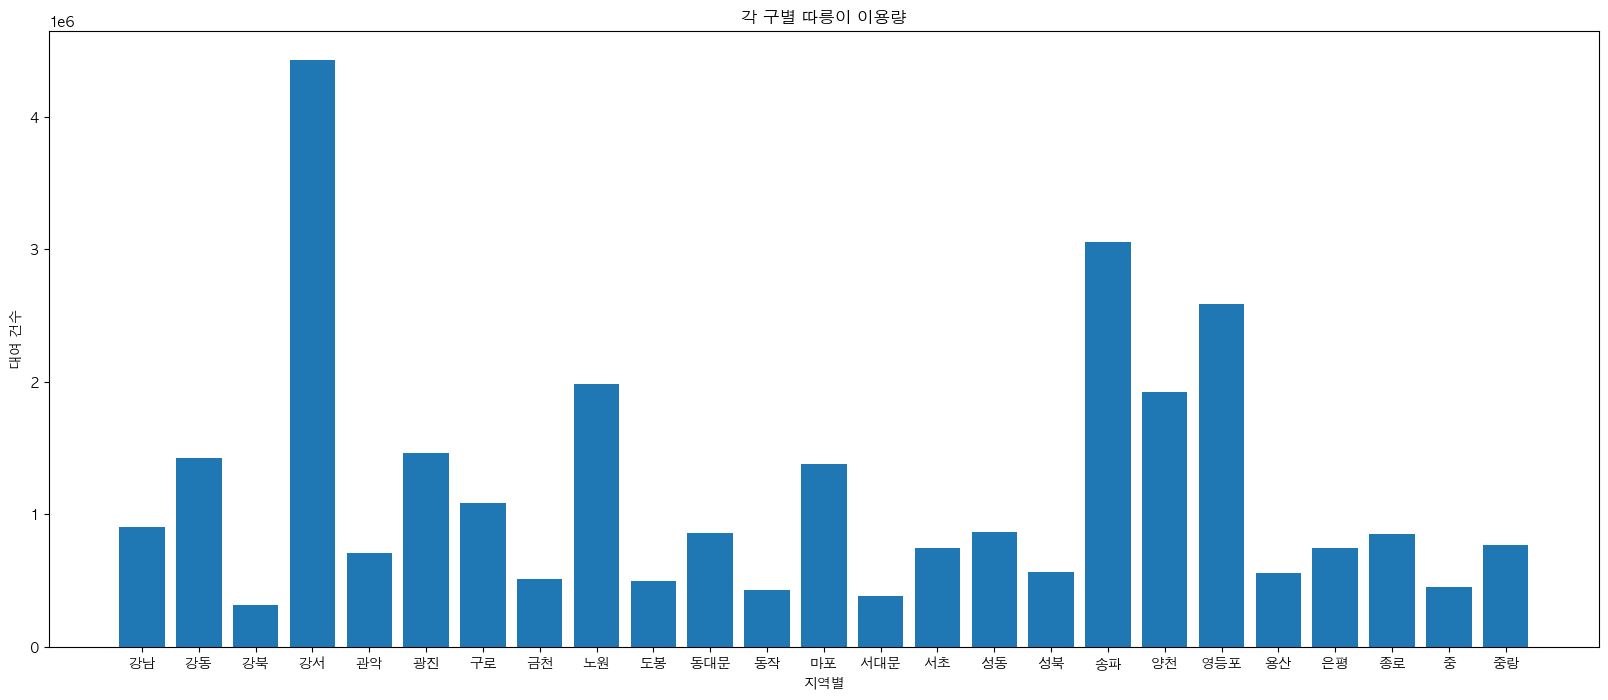

In [58]:
import matplotlib as mpl
import matplotlib.font_manager as fm
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(구별_이용량['시작_대여소_구'], 구별_이용량['이동_수'])

plt.title('각 구별 따릉이 이용량')
plt.xlabel('지역별')
plt.ylabel('대여 건수')

plt.show()

## 강서구 따릉이 이용량 EDA

### 서울시 따릉이대여소 마스터 정보.csv >> 대여소 ID, 구 단위 저장

In [23]:
import numpy as np
import pandas as pd

# 따릉이 마스터 정보 불러오기
data= pd.read_csv('../../Data/따릉이/서울시 따릉이대여소 마스터 정보.csv',encoding='cp949')
# print(data)

# 구 단위 저장
대여소_data = data[['대여소_ID', '주소1']]
대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')

print(대여소_data)

       대여소_ID 주소1
0      ST-999  양천
1      ST-998  양천
2      ST-997  양천
3      ST-996  양천
4      ST-995  양천
...       ...  ..
3281  ST-1002  양천
3282  ST-1001  양천
3283  ST-1000  양천
3284   ST-100  광진
3285    ST-10  마포

[3286 rows x 2 columns]


/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_1465/3976061394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  대여소_data['주소1'] = data['주소1'].str.extract(r'(\S+)구')


### 서울시 전체 >> 강서구

In [ ]:
# 강서구 따릉이 대여소 ID 변수 생성

강서_대여소_ID = 대여소_data.loc[대여소_data['주소1'] == '강서', '대여소_ID']
강서_대여소_ID_df = pd.DataFrame({'대여소_ID': 강서_대여소_ID})

# csv 파일 저장
# 강서_대여소_ID_df.to_csv('강서_따릉이_대여소_ID.csv', index=False)

print(강서_대여소_ID)

### 강서구 따릉이 이용량 데이터 생성
* 2023.04~2024.03 
* 날짜를 기준으로 랜덤하게 2등분

In [30]:
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')
print(강서_데이터.sort_values(by='기준_날짜'))

              기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
1707858  2023-04-03    2010   ST-1069   ST-2031      1       28      3750
1701178  2023-04-03    1310    ST-525   ST-2056      1       18      1730
1701177  2023-04-03    1310    ST-523   ST-1251      1       13      2237
1701176  2023-04-03    1310    ST-517   ST-1506      1        6      1148
1701175  2023-04-03    1310    ST-514   ST-2031      1        5       960
...             ...     ...       ...       ...    ...      ...       ...
317389   2024-03-27    1140   ST-2045    ST-975      1        6       947
317390   2024-03-27    1140   ST-2047   ST-2056      1        9      1020
317391   2024-03-27    1140   ST-2047   ST-3145      1        1       353
317379   2024-03-27    1140   ST-2024   ST-1069      1       13      1866
316944   2024-03-27    1040    ST-517   ST-2487      1        9      1107

[1772062 rows x 7 columns]


### 24년 신설한 대여소 ID 확인 

In [27]:
# 23년 강서구 따릉이 이용량

강서_2023 = pd.read_csv('../../../../data_semi/강서_따릉이_data_2023.csv',encoding='utf-8')
# 강서_2023.sort_values(by='기준_날짜')
# 강서_2023.dropna().sort_values(by='기준_날짜')

print('23.01 ~ 23.12')
print(강서_2023['시작_대여소_ID'].nunique())
print()

print('23.04 ~ 24.03')
print(강서_데이터['시작_대여소_ID'].nunique())
print()

23.01 ~ 23.12
194

23.04 ~ 24.03
195



In [29]:
강서_대여소_added_2024 = 강서_데이터[~강서_데이터['시작_대여소_ID'].isin(강서_2023['시작_대여소_ID'])]
print('24년에 신설된 대여소 ID')
print(강서_대여소_added_2024['시작_대여소_ID'].unique())
print()
print('대여소 신설 정보')
print(강서_대여소_added_2024.head())
print()
print('신설한 대여소를 이용한 데이터 개수:')
print(len(강서_대여소_added_2024))

24년에 신설된 대여소 ID
['ST-3284']

대여소 신설 정보
             기준_날짜  기준_시간대 시작_대여소_ID 종료_대여소_ID  전체_건수  전체_이용_분  전체_이용_거리
316896  2024-03-27    1035   ST-3284   ST-1510      1       37      4664
317598  2024-03-27    1200   ST-3284   ST-3118      1       52      6910
319869  2024-03-27    1600   ST-3284   ST-1252      1        4       420
320042  2024-03-27    1610   ST-3284   ST-2993      1       16      1770
810654  2024-03-21    1555   ST-3284    ST-835      1       16      2046

신설한 대여소를 이용한 데이터 개수:
22


따릉이 이용 시간 및 이용 거리 / 결측치 처리

In [59]:
# 이용 시간 = 0, 전체 이용 거리 = 0 인 데이터 제거
강서_데이터 = 강서_데이터[(강서_데이터['전체_이용_분'] != 0) & (강서_데이터['전체_이용_거리'] != 0)]

In [60]:
# 집계 기준이 시작,  도착 두가지(같은 데이터인데 도착이 2가지이므로 한가지 제거)
강서_데이터 = 강서_데이터[data2['집계_기준'] != '도착시간']

NameError: name 'data2' is not defined

강서구 >> 강서구 평일

In [ ]:
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'], format='%Y/%m/%d')

강서_데이터 = 강서_데이터[강서_데이터['기준_날짜'].dt.dayofweek < 5]

강서구 시간대별

In [33]:
def divide_time_range1(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수2 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum()

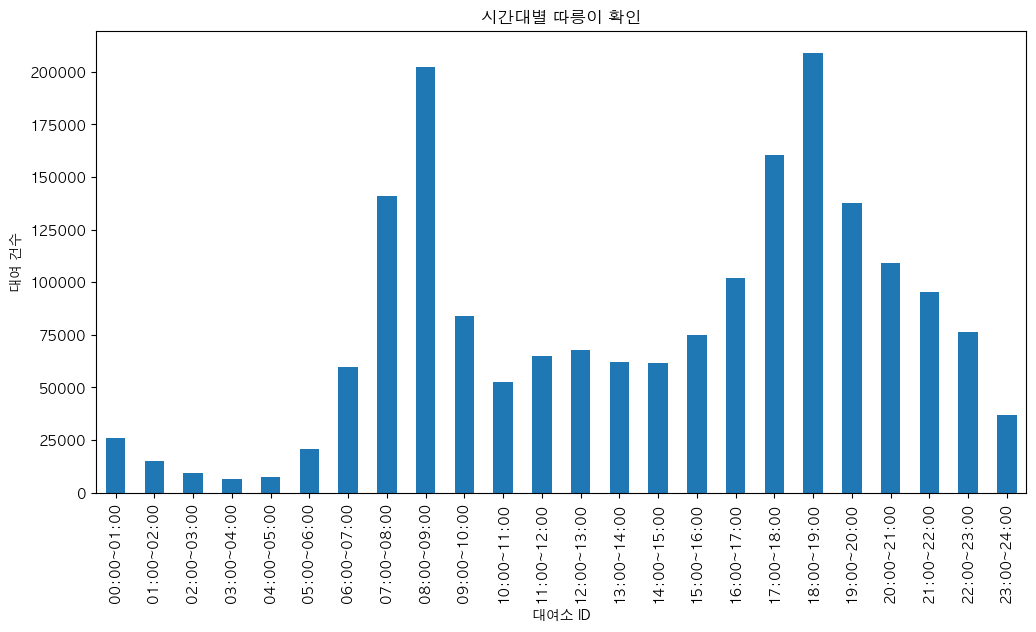

In [54]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수2.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

강서구 출,퇴근 시간별

In [36]:
def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00' # 출근시간
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00' # 퇴근시간
    else:
        return '20:00~24:00'

강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum()


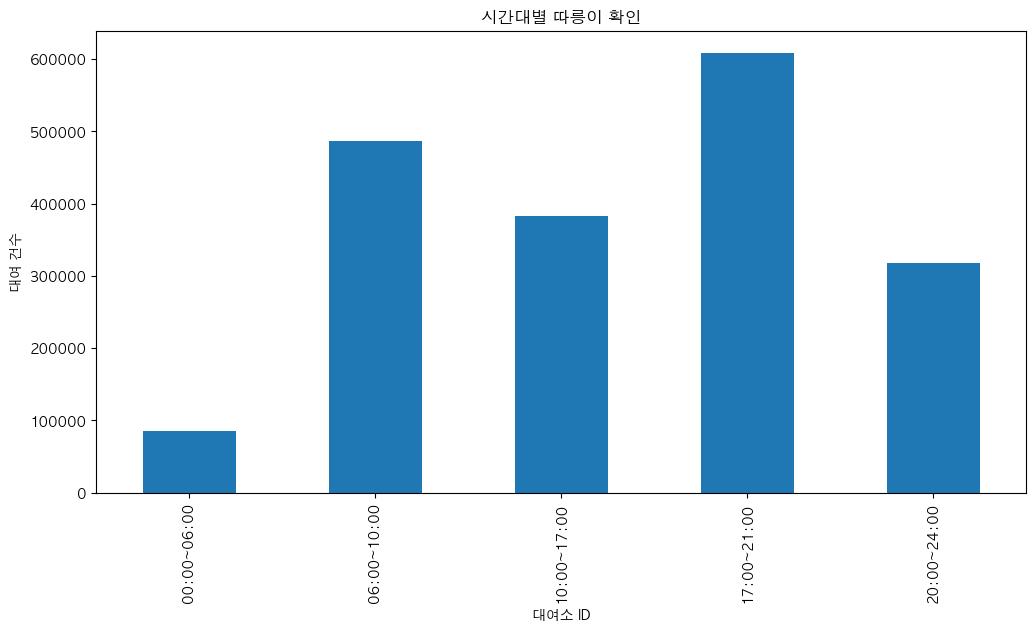

In [50]:
plt.figure(figsize=(12, 6))
강서_시간대별_건수.plot(kind='bar')
plt.title('시간대별 따릉이 확인')
plt.xlabel('대여소 ID')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)
plt.show()

강서구 요일별

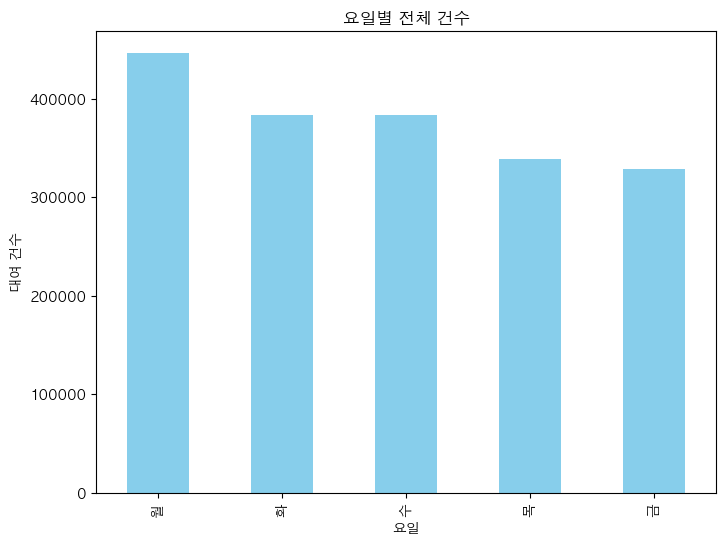

In [51]:

import matplotlib.pyplot as plt
import pandas as pd

# 기준_날짜 열을 날짜 형식으로 변환
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'])

# 기준_날짜 열에서 요일을 추출하여 새로운 열 추가
강서_데이터['요일'] = 강서_데이터['기준_날짜'].dt.day_name()
# 영어 요일명을 한글 요일명으로 변환하는 사전 생성
영어_한글_요일_매핑 = {
    'Monday': '월',
    'Tuesday': '화',
    'Wednesday': '수',
    'Thursday': '목',
    'Friday': '금',

}

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['요일'] = 강서_데이터['요일'].map(영어_한글_요일_매핑)

# 요일별 전체 건수 통계 계산
요일별_통계 = 강서_데이터.groupby('요일')['전체_건수'].sum()


# 막대 그래프 그리기
plt.figure(figsize=(8, 6))
요일별_통계[요일_순서].plot(kind='bar', color='skyblue')
plt.title('요일별 전체 건수')
plt.xlabel('요일')
plt.ylabel('대여 건수')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

##강서구 대여소 쏠림현상 확인

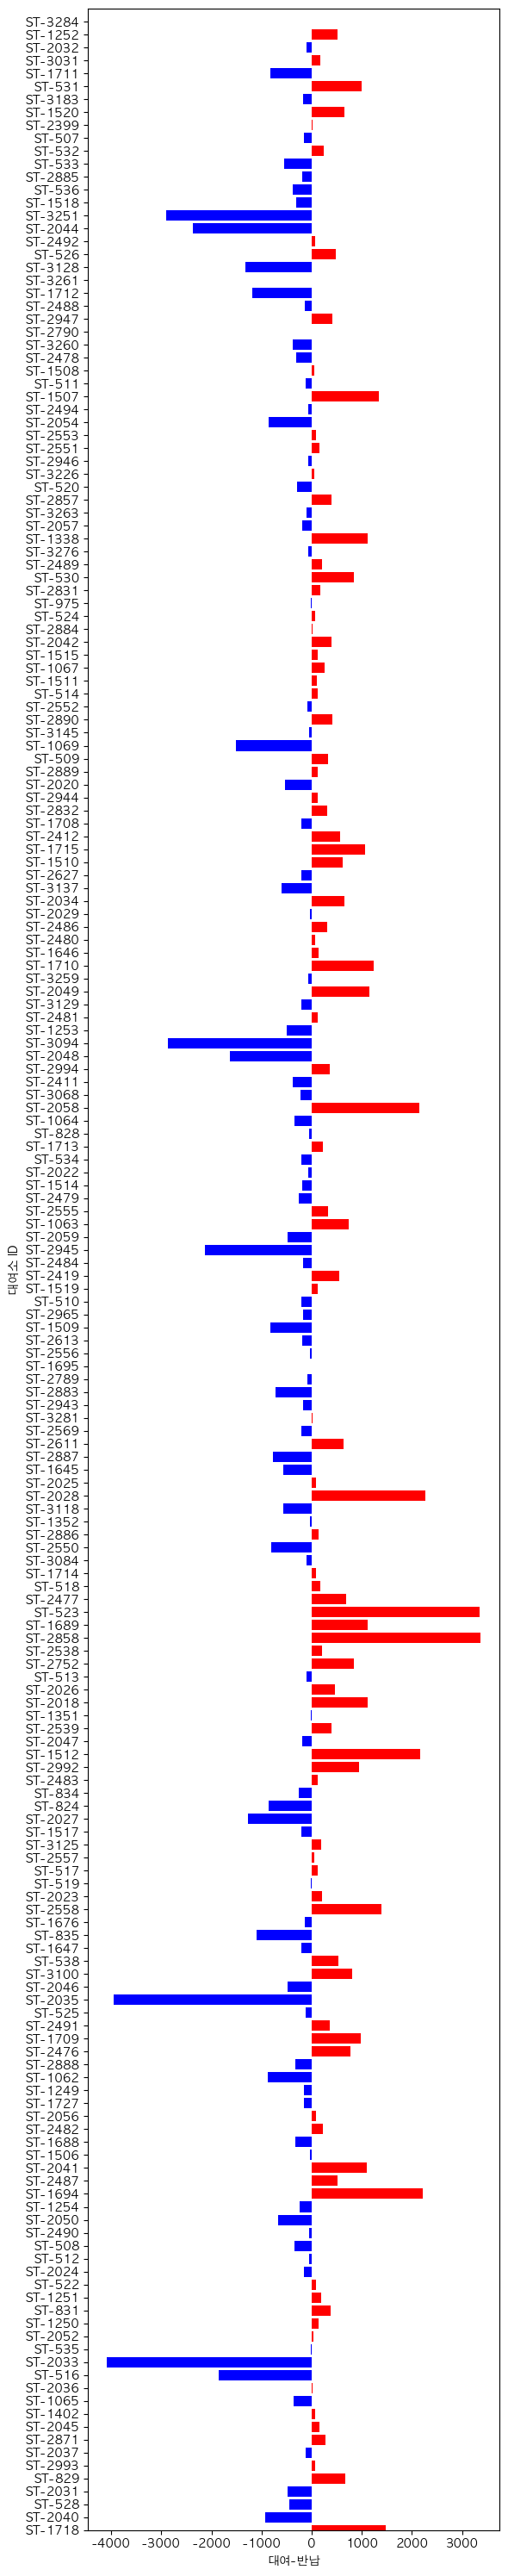

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

# 강서 대여소 ID 정보 불러옴
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

# 강서 대여소 이용 현황 정보 불러옴
강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

# 시작 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 대여한 총량)
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 반납한 총량)
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()

# 강서구에 위치한 대여소 ID 리스트업
len(강서_데이터['시작_대여소_ID'].unique())
# 강서구_대여소_ID_list == '강서구에 위치한 대여소 ID 리스트'로 변수 지정
강서_대여소_ID_list= 강서_데이터['시작_대여소_ID'].unique()

# 대여소 ID를 인덱스로 가지는 시작횟수 리스트 생성
temp_list = []
for i in range(len(강서_대여소_ID_list)):
    temp_list.append(시작대여소별_전체횟수[강서_대여소_ID_list[i]])

# start_count == 대여소 ID를 인덱스로 가지는 시작횟수 리스트로 시리즈 변수 생성
start_count = temp_list.copy()

# 대여소 ID를 인덱스로 가지는 종료횟수 리스트 생성
temp_list2 = []
for i in range(len(강서_대여소_ID_list)):
    temp_list2.append(종료대여소별_전체횟수[강서_대여소_ID_list[i]])

# end_count == 대여소 ID를 인덱스로 가지는 종료횟수 리스트로 시리즈 변수 생성
end_count = temp_list2.copy()

# 강서_대여소_정보 DataFrame 생성
# column = ['대여소_ID', '대여건수', '반납건수']
강서_대여소_정보 = {'대여소_ID' : 강서_대여소_ID_list, '대여건수' : start_count, '반납건수' : end_count}
강서_대여소_정보 = pd.DataFrame(강서_대여소_정보)

# '대여-반납' column 생성 >> 쏠림 현상 유무 확인 기준 지표
강서_대여소_정보['대여-반납'] = 강서_대여소_정보['대여건수'] - 강서_대여소_정보['반납건수']

# '대여-반납'값 : x축 / 대여소_ID : y축 을 가지는 그래프 생성
import matplotlib.font_manager as fm

colors = ['red' if val > 0 else 'blue' for val in 강서_대여소_정보['대여-반납']]
fig, ax = plt.subplots(figsize=(6,30))

plt.barh(강서_대여소_정보['대여소_ID'], 강서_대여소_정보['대여-반납'], color = colors)
# plt.xticks(rotation=90)
plt.ylabel('대여소 ID')
plt.xlabel('대여-반납')
plt.ylim(0, 195)

plt.tight_layout()
plt.show()

# 해당 그래프 분석을 통한 쏠림 현상 발생 대여소 선별 예정

## 기상 데이터와 강서구 따릉이 이용량 상관관계 분석

### 기상 데이터 EDA
* 기온
* 강수량
* 대기질

기온

In [45]:
import numpy as np
import pandas as pd

def convert_date_to_numeric(date):
    date_str = str(date).replace('-', '')
    return int(date_str)

data3 = pd.read_csv('../../Data/기상청/기상청.csv',encoding='utf-8',skiprows=8)
열이름 = ['기준_날짜','평균_기온','최고_기온']
기온 = data3.iloc[:,1:4]
기온.columns = 열이름
기온['최저_기온'] = data3.iloc[:,5]
기온['기준_날짜'] = 기온['기준_날짜'].apply(convert_date_to_numeric)
print(기온)

ValueError: invalid literal for int() with base 10: '서울'

강수량

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def categorize_value(value):
    if pd.isna(value):
        return 0
    if value < 5:
        return 5
    elif value < 10:
        return 10
    elif value < 20:
        return 20
    elif value < 30:
        return 30
    elif value < 50:
        return 50
    elif value < 80:
        return 80
    else:
        return 100

data4 = pd.read_csv('../../Data/기상청/강수량.csv',encoding='utf-8',skiprows=7)
data4 = data4.dropna()

data4["강수량"] = data4['강수량(mm)'].apply(categorize_value)
data4['날짜'] = pd.to_datetime(data4['날짜'])

In [47]:
### plot
precipi = Data["강수량"]
date = Data['날짜']

bottomspace = 3

fig, ax = plt.subplots(figsize=(12, 4))

ax.set_ylim(-bottomspace, 100)
ax.bar(date, precipi+bottomspace, align='edge', bottom = -bottomspace)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=1))


ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y')

NameError: name 'Data' is not defined

대기질

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 대기질 데이터 불러오기
data5 = pd.read_csv('../../Data/기상청/미세먼지.csv')

# 서울시 전체 >> 강서구 데이터
미세먼지_강서구_data = data5[data5['측정소명']=='강서구']
미세먼지_강서구_data = 미세먼지_강서구_data.rename(columns={'측정일시': '기준_날짜'})
미세먼지 = 미세먼지_강서구_data[['기준_날짜','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']].reset_index(drop=True)

# 기준 날짜 type 변경 >> datetime
미세먼지['기준_날짜'] = (미세먼지['기준_날짜'].astype(str).str[0:4]) + '-' + (미세먼지['기준_날짜'].astype(str).str[4:6]) + '-' + (미세먼지['기준_날짜'].astype(str).str[6:8])
미세먼지['기준_날짜'] = pd.to_datetime(미세먼지['기준_날짜'])

print('미세먼지')
print(미세먼지)

미세먼지
         기준_날짜  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0   2023-01-01       62.0        38.0
1   2023-01-02       32.0        11.0
2   2023-01-03       37.0        16.0
3   2023-01-04       48.0        26.0
4   2023-01-05       66.0        38.0
..         ...        ...         ...
360 2023-12-27       88.0        55.0
361 2023-12-28       58.0        37.0
362 2023-12-29       46.0        29.0
363 2023-12-30       40.0        28.0
364 2023-12-31       26.0        17.0

[365 rows x 3 columns]


In [ ]:
미세먼지.describe()

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,365.000000,365.000000
mean,42.134247,19.235616
std,30.551543,12.974376
min,5.000000,1.000000
25%,23.000000,11.000000
50%,34.000000,16.000000
75%,51.000000,24.000000
max,286.000000,87.000000


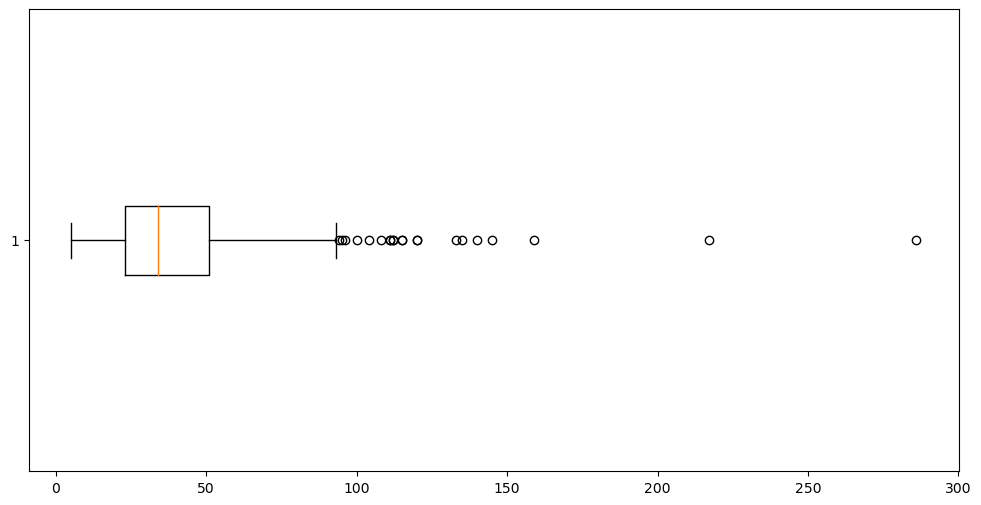

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))

ax.boxplot(미세먼지['미세먼지(㎍/㎥)'], vert=False)

plt.show()

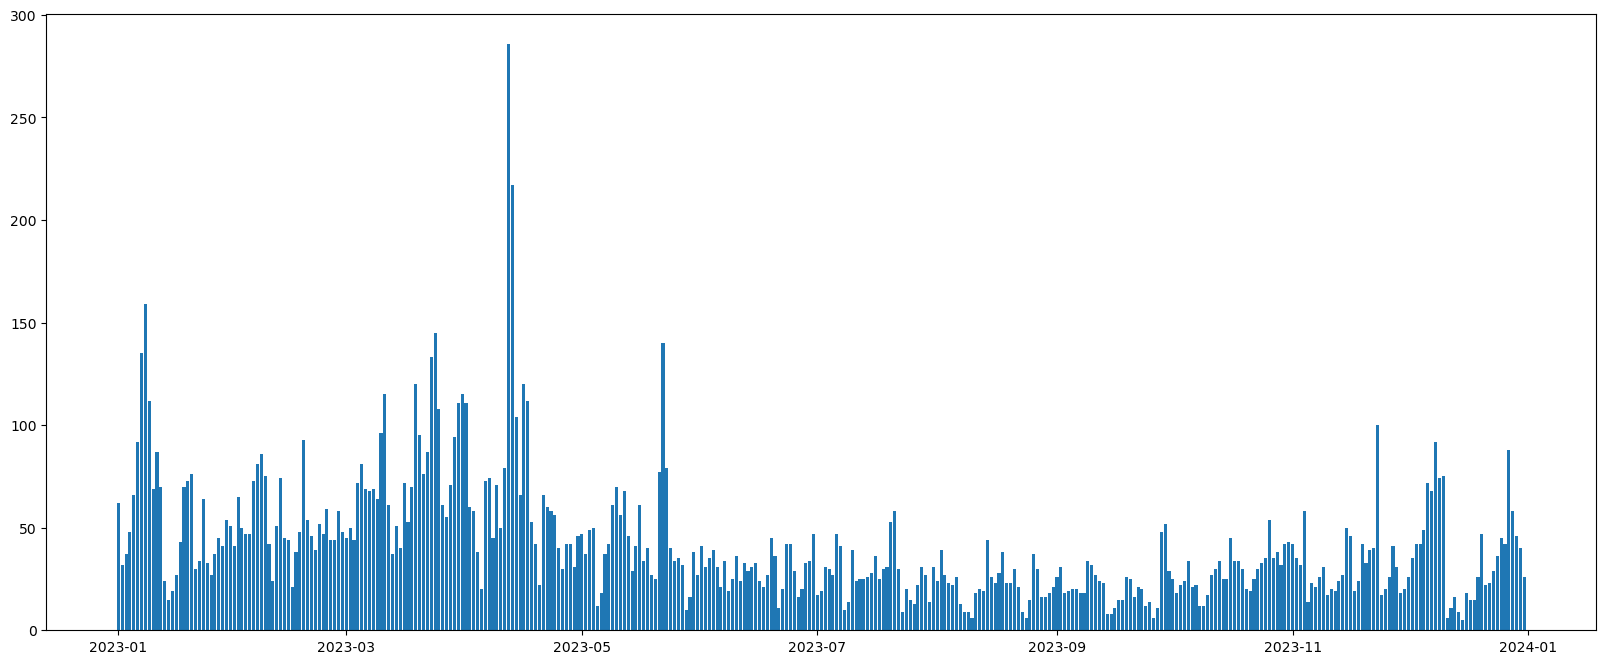

In [ ]:
# 바 그래프

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(미세먼지['기준_날짜'], 미세먼지['미세먼지(㎍/㎥)'], label = '미세먼지')
# ax.bar(미세먼지['기준_날짜'], 미세먼지['초미세먼지(㎍/㎥)'], label = '초미세먼지')

plt.show()